[Iron Condor Calculator](https://www.optionsprofitcalculator.com/calculator/iron-condor.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import robin_stocks as r
import os
import datetime as dt
from dotenv import load_dotenv
from pathlib import Path

env_path = Path('.') / '.env'
load_dotenv(dotenv_path=env_path)

RH_USER = os.getenv("RH_USER")
RH_PASS = os.getenv("RH_PASS")

In [2]:
r.login(RH_USER, RH_PASS)

my_stocks = r.build_holdings()
df = pd.DataFrame(my_stocks)
df = df.T
df['ticker'] = df.index
df = df.reset_index(drop=True)
df

,price,quantity,average_buy_price,equity,percent_change,equity_change,type,name,id,pe_ratio,percentage,ticker
0,16.095000,22.43318900,15.6019,361.06,3.16,11.061805,stock,Carnival,3324b13c-dc23-40e8-8807-76d87fdb09ed,None,96.72,CCL
1,25.615000,0.47295500,26.3450,12.11,-2.77,-0.345257,stock,Bank of America,0dd811b3-7047-448d-96e0-7bf6ee4cfe45,12.003800,3.25,BAC


<AxesSubplot:>

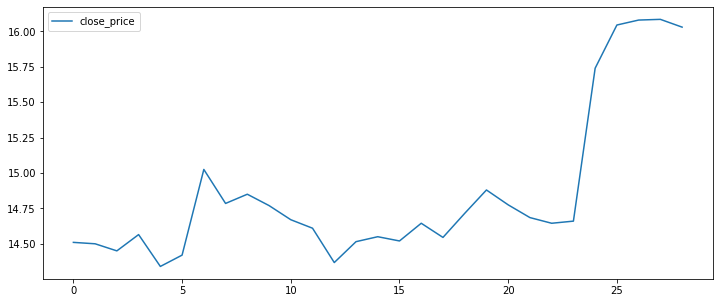

In [3]:
ccl_data = r.stocks.get_stock_historicals("CCL", span='week', bounds='regular')
ccl = pd.DataFrame(ccl_data)

column_list = ['close_price', 'high_price', 'low_price', 'open_price']
for i in column_list:
    ccl[i] = ccl[i].astype(float)
    
ccl['close_price'].plot(legend=True, figsize=(12, 5))

In [4]:
stock = "CCL"

options_data = r.options.find_tradable_options(stock, optionType='call')
options = pd.DataFrame(options_data)

Found Additional pages.
Loading page 2 ...
Loading page 3 ...


In [5]:
now = dt.datetime.now()
start = now + dt.timedelta(30)
end = now + dt.timedelta(45)
date_generated = [start + dt.timedelta(days=x) for x in range(0, (end-start).days)]

date_list = []

for date in date_generated:
    date_list.append(date.strftime("%Y-%m-%d"))

new_df = options[options['expiration_date'].isin(date_list)].reset_index(drop=True)

In [7]:
current_price = r.stocks.get_latest_price(stock)[0]

strike_list = new_df.strike_price.unique().tolist()
strike_list.append(current_price)

strike_list_sorted = sorted(strike_list, key=float)

i = strike_list_sorted.index(current_price)

strike_a = strike_list_sorted[i-2] # Long put strike price
strike_b = strike_list_sorted[i-1] # Short put strike price
strike_c = strike_list_sorted[i+1] # Short call strike price
strike_d = strike_list_sorted[i+2] # Long call strike price

print(strike_a, strike_b, strike_c, strike_d)

exp_date = sorted(new_df.expiration_date.unique())[-1]

15.5000 16.0000 16.5000 17.0000


In [ ]:
# #long put
# r.orders.order_buy_option_limit(current_price, stock, 1, exp_date, strike_a, optionType='put', timeInForce='gfd')

# #short put
# r.orders.order_buy_option_limit(current_price, stock, 1, exp_date, strike_b, optionType='put', timeInForce='gfd')

# #short call
# r.orders.order_buy_option_limit(current_price, stock, 1, exp_date, strike_c, optionType='call', timeInForce='gfd')

# #long call
# r.orders.order_buy_option_limit(current_price, stock, 1, exp_date, strike_d, optionType='call', timeInForce='gfd')
